REGRESIÓN LOGÍSTICA

Fabian Eduardo Peña Pineda

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
Rlogistica=pd.read_csv("C:/Users/fabia/OneDrive/Escritorio/Datos/REGRESIÓN LOGÍSTICA/Regresión Logística.csv")

In [3]:
Rlogistica.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
Rlogistica[['age','BPMeds']].head()

,age,BPMeds
0,39,0.0
1,46,0.0
2,48,0.0
3,61,0.0
4,46,0.0


<Axes: xlabel='age', ylabel='BPMeds'>

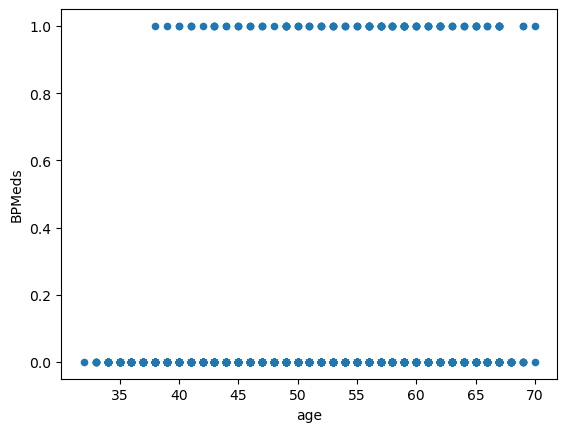

In [5]:
Rlogistica[['age','BPMeds']].plot.scatter(x='age',y='BPMeds')

In [6]:
w=0.1
b=-3.7

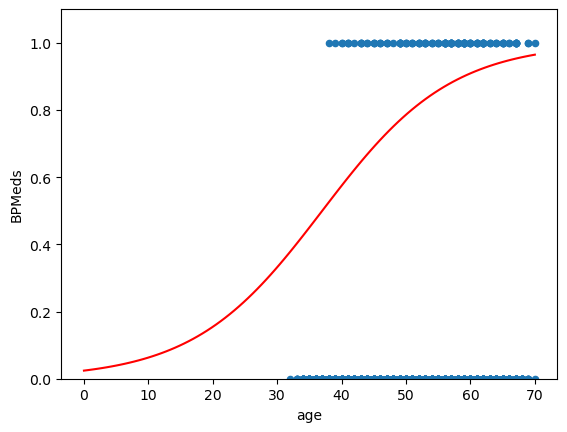

In [7]:
x=np.linspace(0,Rlogistica['age'].max(),100)
y=1/(1+np.exp(-(w*x+b)))

Rlogistica.plot.scatter(x='age',y='BPMeds')
plt.plot(x,y, '-r')
plt.ylim(0,Rlogistica['BPMeds'].max()*1.1)
plt.show()

In [8]:
Rlogistica['sigmoid']=1/(1+np.exp(-(Rlogistica['age']*w+b)))

Rlogistica['loss_xi']=-Rlogistica['BPMeds']*np.log(Rlogistica['sigmoid'])-(1-Rlogistica['BPMeds'])*np.log(1-Rlogistica['sigmoid'])
cost_j=Rlogistica['loss_xi'].mean()
cost_j

1.5104555157234112

In [9]:
array=np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df=pd.DataFrame(data=array, columns=['w','b'])

df['w']=np.round(df['w'],6)
df['b']=np.round(df['b'],6)

In [10]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [11]:
def sum_error_df(df):
    Rlogistica['sigmoid']=1/(1+np.exp(-(Rlogistica['age']*df['w']+df['b'])))
    Rlogistica['loss_xi']=-Rlogistica['BPMeds']*np.log(Rlogistica['sigmoid'])-(1-Rlogistica['BPMeds'])*np.log(1-Rlogistica['sigmoid'])
    j_cost=Rlogistica['loss_xi'].mean()
    return(j_cost)

In [12]:
df['error']=df.apply(sum_error_df, axis=1)

In [13]:
df.sort_values(by=['error']).head()

,w,b,error
0,0.05,-4.00,0.247190
1,0.05,-3.99,0.248776
2,0.05,-3.98,0.250376
3,0.05,-3.97,0.251992
4,0.05,-3.96,0.253622


In [14]:
df_3d=df.pivot(index='w', columns='b', values='error')

In [15]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,0.247190,0.248776,0.250376,0.251992,0.253622,0.255268,0.256929,0.258605,0.260297,0.262004,...,0.459613,0.462875,0.466160,0.469466,0.472795,0.476146,0.479519,0.482914,0.486332,0.489772
0.06,0.351404,0.353865,0.356344,0.358843,0.361360,0.363897,0.366453,0.369029,0.371624,0.374238,...,0.656521,0.660930,0.665363,0.669820,0.674300,0.678803,0.683330,0.687880,0.692454,0.697051
0.07,0.506474,0.509979,0.513506,0.517054,0.520625,0.524217,0.527831,0.531468,0.535126,0.538806,...,0.912208,0.917753,0.923320,0.928910,0.934522,0.940156,0.945813,0.951492,0.957193,0.962916
0.08,0.718006,0.722625,0.727266,0.731930,0.736616,0.741325,0.746056,0.750809,0.755586,0.760384,...,1.222041,1.228603,1.235185,1.241786,1.248407,1.255048,1.261708,1.268387,1.275086,1.281804
0.09,0.985465,0.991156,0.996869,1.002603,1.008358,1.014135,1.019932,1.025751,1.031590,1.037451,...,1.577417,1.584823,1.592245,1.599683,1.607137,1.614607,1.622093,1.629594,1.637112,1.644645


In [16]:
x=df_3d.columns
y=df_3d.index
X,Y=np.meshgrid(x,y)
Z=df_3d

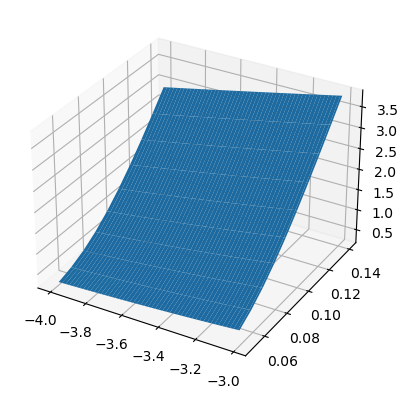

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)

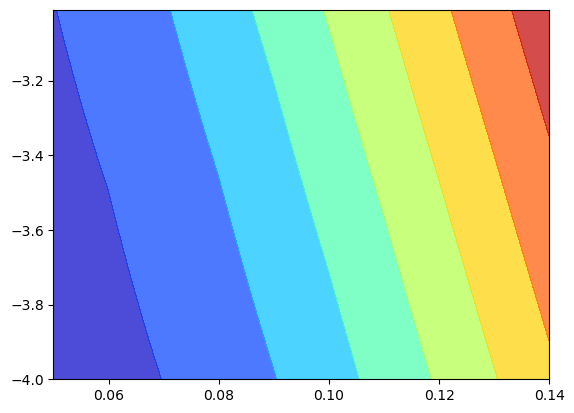

In [18]:
x=df_3d.columns
y=df_3d.index
X,Y=np.meshgrid(x,y)
Z=df_3d
plt.contourf(Y,X,Z, alpha=0.7, cmap=plt.cm.jet)